# Topological Braiding Circuit Simulator
## with Fibonacci anyons

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

This is a brief tutorial to implement simple circuits with a pre-built simulator of Fibonacci braiding circuits.

## Single Qubit Topoligical Circuit

In [1]:
from cqt_anyons import AnyonicCircuit
import matplotlib.pyplot as plt
from IPython.display import Latex
from cplot import cplot

In [2]:
# Intitialize your braiding circuit
circuit3 = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=3)
circuit4 = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=4)

As shown in code, the _AnyonicCircuit_ has two parameters:
1. _nb\_qudits_ : which is the number of qudits in the circuit.
2. _nb\_anyons\_per\_qudit_ : which is the number of anyons you intend to use for each qudit eg. typically 3 or 4.

In [3]:
# Apply clockwise braiding operations
circuit3.braid(1, 2)
circuit3.braid(2, 3)

circuit4.braid(2, 3)
circuit4.braid(3, 4)

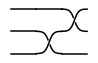

In [4]:
# Drawing the braiding circuit
circuit3.draw()

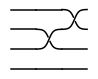

In [5]:
# Drawing the braiding circuit
circuit4.draw()

In [6]:
### Apply counter-clockwise braiding operations
circuit3.braid(2, 1)
circuit3.braid(3, 2)

circuit4.braid(3, 2)
circuit4.braid(4, 3)

Once you flip the indices of braided anyons, you get the inverse braiding operation.

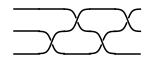

In [7]:
# Drawing the braiding circuit
circuit3.draw()

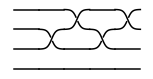

In [8]:
# Drawing the braiding circuit
circuit4.draw()

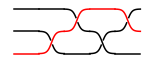

In [9]:
# Highlight given strands with specific colors
circuit3.drawer.anyons[1].color = "red"
circuit3.draw()

In [10]:
# Print the braiding sequences
print('3 anyons circuit:', circuit3.history())
print('4 anyons circuit:', circuit4.history())

3 anyons circuit: [(1, 2), (2, 3), (2, 1), (3, 2)]
4 anyons circuit: [(2, 3), (3, 4), (3, 2), (4, 3)]


In [11]:
# Print the braiding sequences
print('3 anyons circuit:')
Latex(circuit3.history("latex"))

3 anyons circuit:


<IPython.core.display.Latex object>

In [12]:
# Print the braiding sequences
print('4 anyons circuit:')
Latex(circuit4.history("latex"))

4 anyons circuit:


<IPython.core.display.Latex object>

In [13]:
# Get the unitary of the braiding circuit
print(circuit3.unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.19098301-0.58778525j  0.63600982+0.46208819j]
 [ 0.        +0.j         -0.63600982+0.46208819j  0.19098301+0.58778525j]]


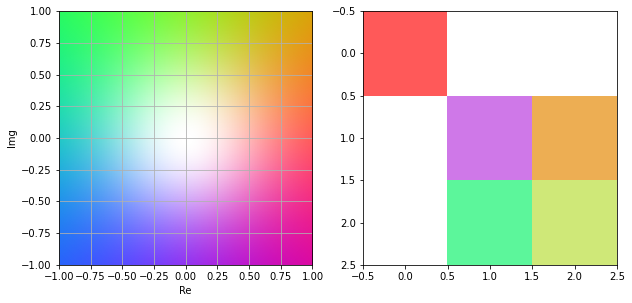

In [14]:
cplot(circuit3.unitary())

In [15]:
# Get the basis
circuit3.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

The basis involves the complete set of fusion states including the non-computational states. The general form of the fusion basis is given by the following fusion diagram.



3 anyons fusion state :

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

            
This state is represented by Python dict :

        {'qudits': [[i, j]] 'roots': []}


In [16]:
# Get the unitary of the braiding circuit
print(circuit4.unitary())

[[ 1.90983006e-01+5.87785252e-01j -6.36009825e-01-4.62088186e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 6.36009825e-01-4.62088186e-01j  1.90983006e-01-5.87785252e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+3.63271264e-01j  5.55111512e-17-4.16333634e-17j
  -6.36009825e-01+4.62088186e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   6.18033989e-01+2.77555756e-17j  5.00000000e-01-3.63271264e-01j
   1.50141553e-01-4.62088186e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.50141553e-01+4.62088186e-01j -6.36009825e-01-4.62088186e-01j
   3.81966011e-01+5.55111512e-17j]]


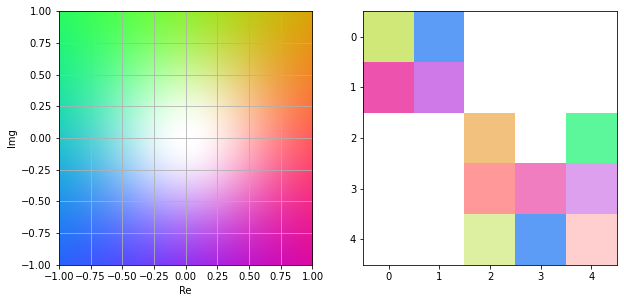

In [17]:
cplot(circuit4.unitary())

In [18]:
# Get the basis
circuit4.basis

[{'qudits': [[0, 1, 0]], 'roots': []},
 {'qudits': [[1, 1, 0]], 'roots': []},
 {'qudits': [[1, 0, 1]], 'roots': []},
 {'qudits': [[0, 1, 1]], 'roots': []},
 {'qudits': [[1, 1, 1]], 'roots': []}]


4 anyons fusion state :

        1 1 1 1
        \/  / /
        i\ / /
         j\ /   
          k\   

            
This state is represented by Python dict :

        {'qudits': [[i, j, k]] 'roots': []}



In [19]:
# Measure the circuit by fusing all 
circuit3.measure()
circuit4.measure()

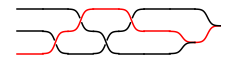

In [20]:
circuit3.draw()

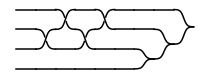

In [21]:
circuit4.draw()

In [22]:
# Get the result of measurement in given number of shots for given input state
result3 = circuit3.run(shots=1000)

In [23]:
print(result3)

{'counts': {'0': 1000}, 'memory': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0

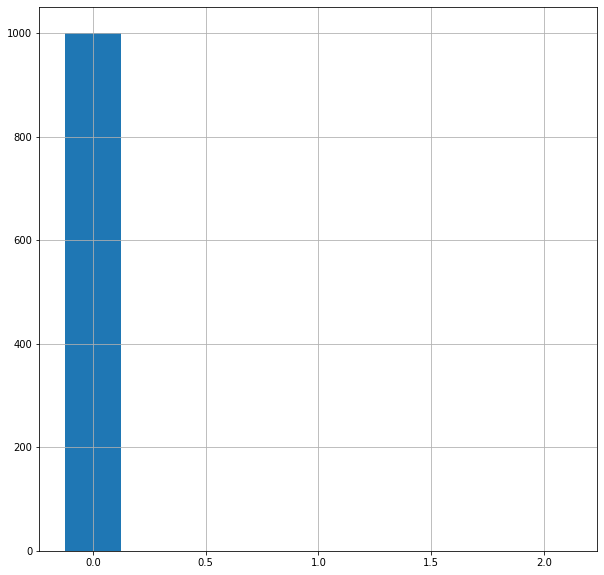

In [24]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result3['memory'], [0, 1, 2, 3], align='left', rwidth=0.25)
plt.grid()
plt.show()

In [25]:
# Get the result of measurement in given number of shots for given input state
result4 = circuit4.run(shots=1000)

In [26]:
print(result4)

{'counts': {'0': 385, '1': 615}, 'memory': array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1

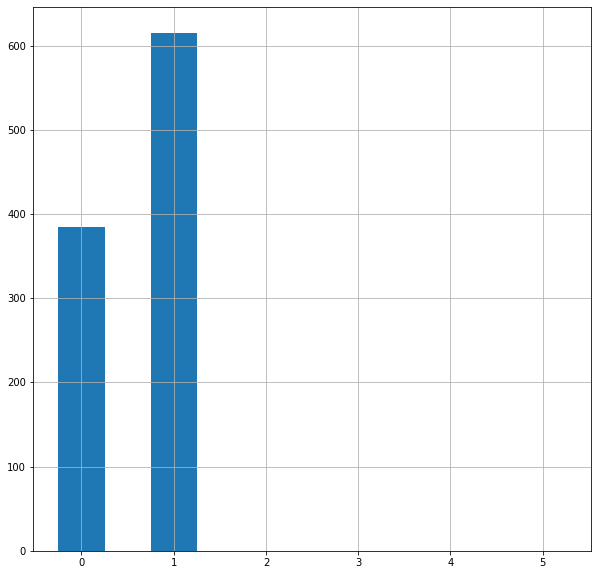

In [27]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result4['memory'], [0, 1, 2, 3, 4 , 5, 6], align='left', rwidth=0.5)
plt.grid()
plt.show()

## Multi-Qubit Topological Circuits

    Example: n_qubits = 3, n_anyons_per_qubit = 3
    
        1 1 1 1 1 1 1 1 1
        \/  / \/  / \/  /
        i\ /  k\ /  e\ /
          \     /     /
          j\  l/     /f
            \ /     / 
            m\     /
              \   /
               \ /
               t|
  
    This state is represented by the following Python dict:
    
        {'qudits': [[i, j], [k, l], [e, f]], 'roots': [m, t]}

In [28]:
circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=4)

In [29]:
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(3, 4)
circuit.braid(4, 5)
circuit.braid(5, 6)

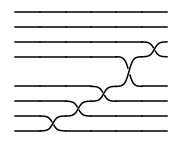

In [30]:
circuit.draw()

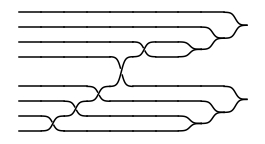

In [31]:
# Measure the fusion circuit
circuit.measure()
circuit.draw()

In [32]:
# The dimension of the basis
circuit.dim

34

In [33]:
# The unitary of the circuit
circuit.unitary()

array([[-0.30901699+0.22451399j, -0.39307569+0.2855862j ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.39307569+0.2855862j ,  0.30901699-0.22451399j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.11803399-0.36327126j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.02786405+0.36327126j,
        -0.02786405+0.36327126j,  0.02190536-0.2855862j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.39918694+0.05300056j,  0.50777363+0.06741776j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

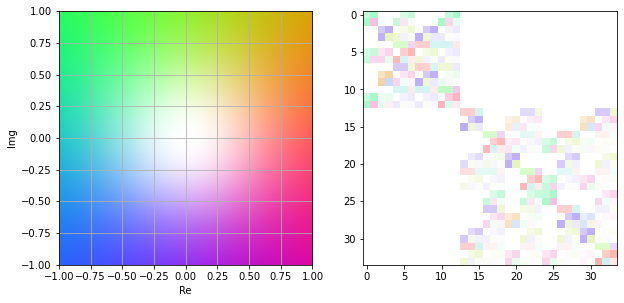

In [34]:
cplot(circuit.unitary())

In [38]:
import numpy as np
# Result of measurement
d = circuit.dim
result = circuit.run(shots=1000)

In [39]:
print(result)

{'counts': {'0': 167, '1': 247, '5': 100, '6': 138, '11': 137, '12': 211}, 'memory': array([ 5,  1,  6,  0, 12, 12,  0,  6,  6, 11,  1,  6, 11, 12,  0,  6,  6,
       12, 11,  0,  6,  6,  0,  1,  1,  0,  5,  1, 12, 12,  0,  5, 12, 11,
        1,  1,  0,  1,  1,  1, 12, 11,  1,  5,  1,  6, 12,  6,  1, 12, 11,
        1,  0,  6, 12, 11, 12, 12,  6,  0,  0,  5, 11, 12,  0,  1,  5, 12,
        1,  6,  6, 11, 12,  6, 11,  5, 11,  1,  1,  1,  6, 11,  0,  5,  1,
        5,  6,  6,  0,  1, 11,  0,  1,  0, 12, 12, 12, 12, 11,  1, 11,  0,
        0,  0,  5, 11, 12,  1, 11,  0,  1,  0,  0,  6, 12,  1, 12, 12,  5,
       12,  1, 12,  0,  6,  0,  5,  0, 12,  1,  5,  0, 12,  1,  5,  1, 11,
        0,  0,  0, 12,  0, 12, 12,  1,  0, 12, 11,  0,  1,  6, 11, 11,  5,
        1,  6, 11, 11,  6,  1,  1, 12,  1, 12, 11, 11,  0,  5,  1, 12,  1,
       12, 12,  5,  1, 12,  5,  1, 11,  1,  0,  1,  5, 11,  5,  5, 12, 12,
        1,  1,  6, 12,  5, 12,  1, 12,  5, 12,  0,  0,  1, 12,  6, 12, 12,
        0,  0, 

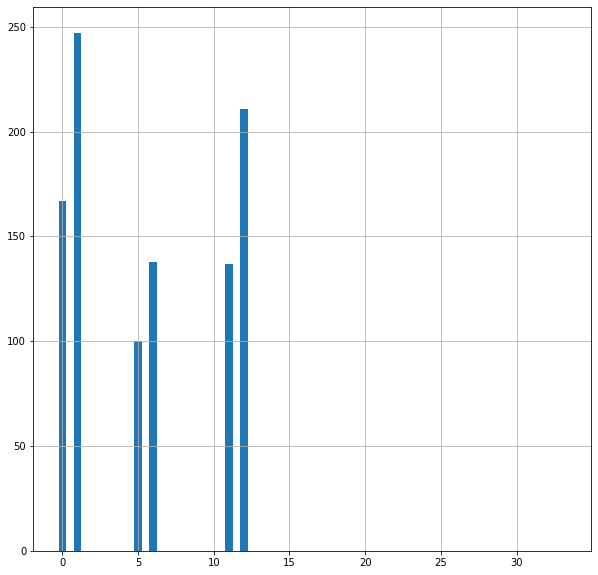

In [40]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [ii for ii in range(d+1)], align='left', rwidth=0.5)
plt.grid()
plt.show()